## Titanic EDA and Survival Prediction 

Competition Goal :

Analysis and prediction of what sorts of people were likely to survive.

Data Description :

2 Files - Train and Test Data

#### Data Dictionary
Variable	Definition	Key
survival 	Survival 	0 = No, 1 = Yes
pclass 	Ticket class 	1 = 1st, 2 = 2nd, 3 = 3rd
sex 	Sex 	
Age 	Age in years 	
sibsp 	# of siblings / spouses aboard the Titanic 	
parch 	# of parents / children aboard the Titanic 	
ticket 	Ticket number 	
fare 	Passenger fare 	
cabin 	Cabin number 	
embarked 	Port of Embarkation 	C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

### Getting the data

In [374]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [375]:
# Create two datasets for Train and Test Data

dfTrain = pd.read_csv('train.csv')
dfTest = pd.read_csv('test.csv')

In [376]:
# Use .info() to check the datatypes and missing values if any

dfTrain.info()
print('----------------------------')
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare

As we can see from the above output :

For the Training Set:
- Age has a few missing values (177 entries)
- Cabin also has many missing values (687 entries)
- Embarked has 2 missing values

For the Test Set:
- Age has a few missing values (86 entries)
- Cabin has many missing values (327 entries)
- Fare has 1 missing entry

In [377]:
# Check first few entries both dataframes 

dfTrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [378]:
dfTest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [379]:
# We will go ahead and drop some of the columns that will not be used for prediction

dfTrain.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True)
dfTest.drop(['Name','Ticket','Cabin'], axis=1, inplace=True)

### Data Visualization

We will create a few plots to see which type of people seem to have a better chance of survival. 

Let's make simple countplots to see the survival trend across the Sex, Pclass and Embarked features.

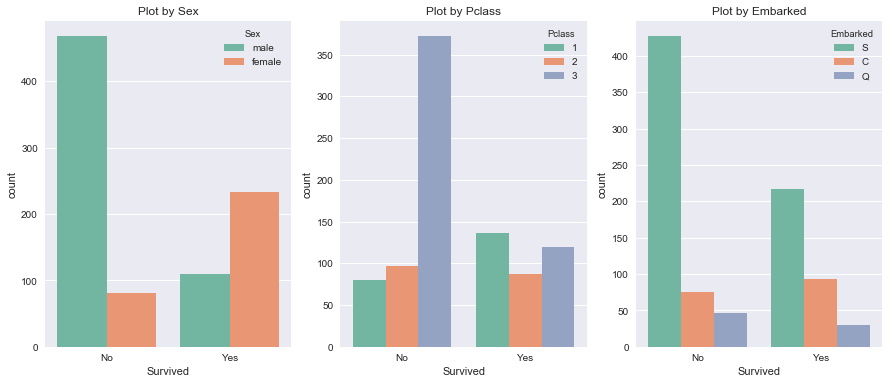

In [380]:
discreteVarList = ['Sex', 'Pclass', 'Embarked']

# Create a 3x1 plot
fig1, axes1 = plt.subplots(1,3, figsize=(15,6)) 

# Fill in the subplot
for i in range(3): 
    sns.countplot(x='Survived', hue=discreteVarList[i], data=dfTrain, palette='Set2', ax=axes1[i])
    axes1[i].set_xticklabels(['No', 'Yes'])
    axes1[i].set_title('Plot by '+ discreteVarList[i])

Excellent! We can make the following observations based on the plots above:

1. Females seem to have a higher survival chance
2. People in Pclass 3 have a lower survival rate, Pclass 1 seems to have the best survival rate
3. People who embarked from S seem to have a lower survival rate - which seems to follow our second observation as majority of people who embarked from S are in Pclass 3 (see below)

In [381]:
dfTrain.loc[(dfTrain['Embarked']=='S')].Pclass.value_counts()

3    353
2    164
1    127
Name: Pclass, dtype: int64

Pclass 3 has majority of people who Embarked from S. 

Next, I want to take a closer look at the survival plots for Pclass 1 and 3 by Sex.

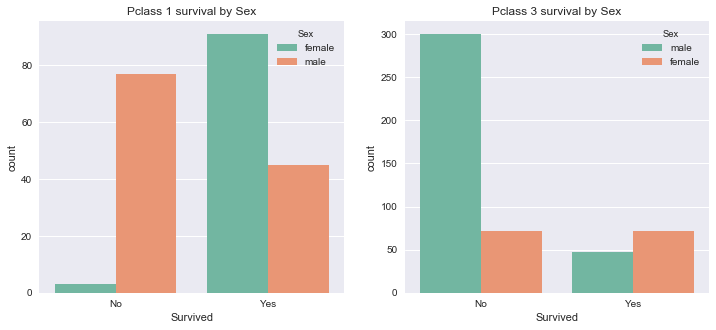

In [382]:
# Create plot for which gender had beetter chances of survival in Pclass 1 & 3

fig1, axes1 = plt.subplots(1,2, figsize=(12,5)) 

sns.countplot(x='Survived', hue='Sex', data=dfTrain.loc[dfTrain['Pclass']==1], palette='Set2', ax=axes1[0])
axes1[0].set_xticklabels(['No', 'Yes'])
axes1[0].set_title('Pclass 1 survival by Sex')


sns.countplot(x='Survived', hue='Sex', data=dfTrain.loc[dfTrain['Pclass']==3], palette='Set2', ax=axes1[1])
axes1[1].set_xticklabels(['No', 'Yes'])
axes1[1].set_title('Pclass 3 survival by Sex')

In [383]:
print('Survived Pclass 1')
print(dfTrain.loc[(dfTrain['Pclass']==1) & (dfTrain['Survived']==1)].Sex.value_counts())
print('Not Survived Pclass 1')
print(dfTrain.loc[(dfTrain['Pclass']==1) & (dfTrain['Survived']==0)].Sex.value_counts())

Survived Pclass 1
female    91
male      45
Name: Sex, dtype: int64
Not Survived Pclass 1
male      77
female     3
Name: Sex, dtype: int64


In [384]:
print('Survived Pclass 3')
print(dfTrain.loc[(dfTrain['Pclass']==3) & (dfTrain['Survived']==1)].Sex.value_counts())
print('Not Survived Pclass 3')
print(dfTrain.loc[(dfTrain['Pclass']==3) & (dfTrain['Survived']==0)].Sex.value_counts())

Survived Pclass 3
female    72
male      47
Name: Sex, dtype: int64
Not Survived Pclass 3
male      300
female     72
Name: Sex, dtype: int64


These plots reiterate again that females just had a better chance of survival. For Pclass 1 only 3% died while for Pclass 3 half the women did not make it. For men from Pclass 1 around 37% of them survived while men from Pclass 3 only around 14% of them survived. 

So we are already seeing a pattern here looking at Sex and Class (including Embarkation point as there seems to be some correlation here)

Let's take a closer look at the survival rate of families now - was it better to be alone or with family aboard the Titanic. 

'Survived'

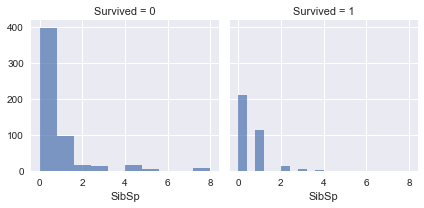

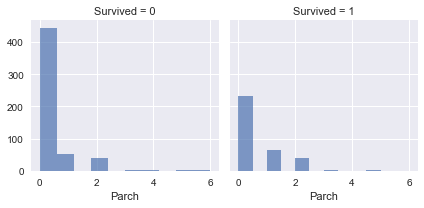

In [385]:
## Function to plot conditioned histograms
def cond_hists(df, plot_cols, grid_col):
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col

## Define columns for making a conditioned histogram
plot_cols2 = ["SibSp",
              "Parch"]
cond_hists(dfTrain, plot_cols2, 'Survived')

Seems like if you were alone, your chances of survival seemed worse. Let's simplify the plot a bit further by adding a column 'Family' with two categories - With Family and Single. This feature engineering will help make our predictions better later on.

In [386]:
# Calculate total family members and make a new column
dfTrain['TotMembers'] = dfTrain['Parch']+dfTrain['SibSp']

# If members more than 0, we add tag 'With Family', if equal to 0 we add tag 'Single'
dfTrain.loc[(dfTrain['TotMembers']>0), 'Family'] = 'With Family'
dfTrain.loc[(dfTrain['TotMembers']==0), 'Family'] = 'Single'

del dfTrain['TotMembers']
dfTrain['Family'].value_counts()


# Do the same for the Test Data as well

# Calculate total family members
dfTest['TotMembers'] = dfTest['Parch']+dfTest['SibSp']

# If members more than 0, we add tag 'With Family', if equal to 0 we add tag 'Single'
dfTest.loc[(dfTest['TotMembers']>0), 'Family'] = 'With Family'
dfTest.loc[(dfTest['TotMembers']==0), 'Family'] = 'Single'

del dfTest['TotMembers']

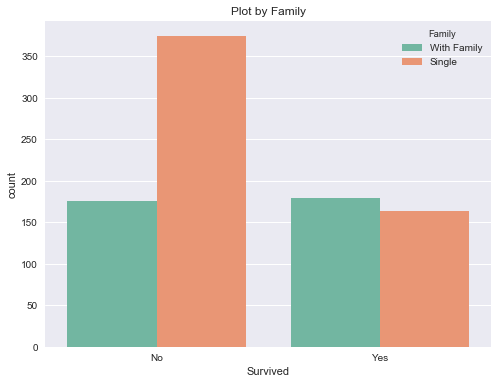

In [387]:
# Create plot for Family and Survived

fig1, axes1 = plt.subplots(1,1, figsize=(8,6)) 

sns.countplot(x='Survived', hue='Family', data=dfTrain, palette='Set2', ax=axes1)
axes1.set_xticklabels(['No', 'Yes'])
axes1.set_title('Plot by Family')

Yes, it does seem like people who were on their own had a lower survival rate. It would be good to look further into whether family members survived together, whether having parents aboard gave their children a better chance of survival and so forth. I will get back to this analysis at a later point. For now, we will continue on and look a little closer at our last variable - Age. 

A simple KDE plot will give us an overview of which age brackets were likely to survive and which ones weren't.

/Users/pallavishinde/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/pallavishinde/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/Users/pallavishinde/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


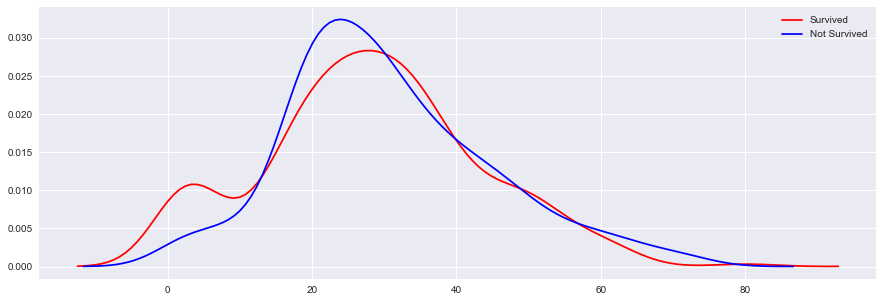

In [388]:
# Survived KDE plot by age

fig, ax = plt.subplots(figsize=(15,5))
sns.kdeplot(dfTrain['Age'].loc[(dfTrain['Survived']==1)], color='r', label='Survived')
sns.kdeplot(dfTrain['Age'].loc[(dfTrain['Survived']==0)], color='b', label='Not Survived')


Let us look at those who survived - babies seem to have better survival rate probably as they were carried and put in first into the boats along with the ladies. For some reason the rate for children aged 10 has fallen drastically (this may be due to less no. of children at that age - we will check this next). The survival rate increases and maintains somewhat until people aged around 40. Beyond that the rate dips and keeps dipping lower.

In [389]:
# First lets quickly check children aged 10

dfTrain.loc[(dfTrain['Age']>=9) & (dfTrain['Age']<=11) ].Age.value_counts()

9.0     8
11.0    4
10.0    2
Name: Age, dtype: int64

Yes, looks like there were only 2 kids at age 10, so the dip in the plot makes sense. 

This brings me to the end of visualizing the data. Now we will deal with all the missing values.

### Missing Values & Feature Engineering

Let's check all the features with missing values and we will then tackle each one at a time.

In [390]:
# Let's check how many missing values we have in the final dataset

print('Training Set')
print(dfTrain.isnull().sum())
print('-----------------')
print('Test Set')
print(dfTest.isnull().sum())

Training Set
Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Family        0
dtype: int64
-----------------
Test Set
PassengerId     0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
Family          0
dtype: int64


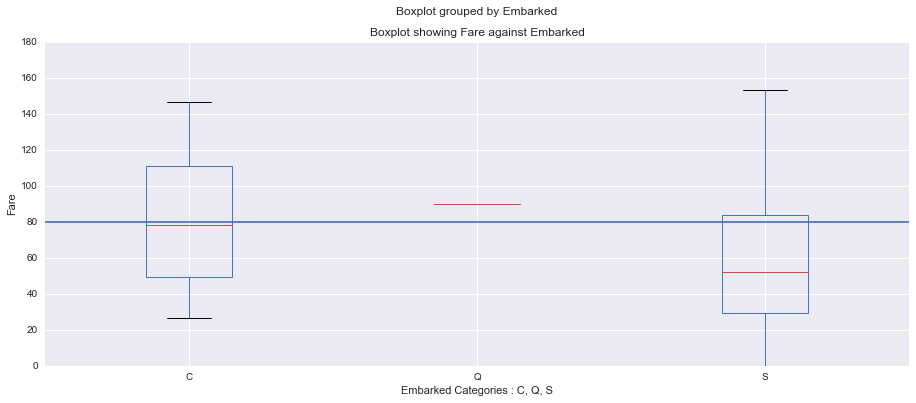

In [391]:
# We will first tackle the 2 values missing for Embarked

# Temp df with all entries for Pclass == 1
temp = dfTrain.loc[ (dfTrain['Pclass']==1) ]

# Make the boxplot

dims=(15,6)
fig, ax = plt.subplots(figsize=dims)
ymin = 0
ymax = 180
ax.set_ylim([ymin, ymax])
temp.boxplot('Fare', by='Embarked', ax=ax)

# Add a horizontal line at 80 (fare for the missing embarked entries) 

plt.axhline(y=80, xmin=0, xmax=1, hold=None)

# Labels and title for the plot
plt.xlabel('Embarked Categories : C, Q, S')
plt.ylabel('Fare')
plt.title('Boxplot showing Fare against Embarked')

Reviewing the boxplot, the best fit would be 'C' as our target fare (80) for Pclass 1 sits close to the median. 

In [392]:
# Fill in missing value

dfTrain['Embarked'].fillna('C', inplace=True)

In [393]:
# The next missing value to take care of is the one missing value for Fare in the Test set

dfTest[dfTest['Fare'].isnull()]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
152,1044,3,male,60.5,0,0,NaN,S,Single


Here we will again look at the Pclass and Embarked values to extrapolate our mean fare Pclass=3 & Embarked=S

In [394]:
# Calculate mean
meanPclass3 = dfTrain.loc[(dfTrain['Pclass']==3) & (dfTrain['Embarked']=='S')].Fare.mean()

# Fill in the missing Fare value with the mean above
dfTest['Fare'].fillna(meanPclass3, inplace=True)

/Users/pallavishinde/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/pallavishinde/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


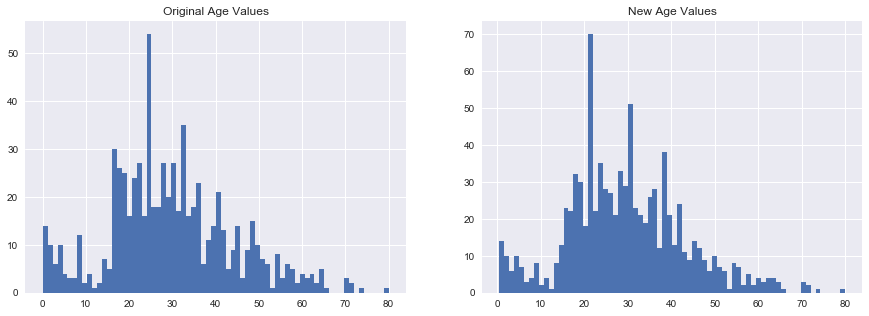

In [395]:
# Thanks to Omar El Gabry (A Journey through Titanic) for this next section in filling out the Age NaNs. 

# Set up the comparative histograms for before and after missing Age values have been filled
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
ax1.set_title('Original Age Values')
ax2.set_title('New Age Values')

# Calculate the mean, standard deviation and total number of NaNs
mean = dfTrain['Age'].mean()
std = dfTrain['Age'].std()
noOfNaNs = dfTrain['Age'].isnull().sum()

mean1 = dfTest['Age'].mean()
std1 = dfTest['Age'].std()
noOfNaNs1 = dfTest['Age'].isnull().sum()

np.random.seed(42)
# Create random numbers between std above and below the mean
random1 = np.random.randint(mean-std, mean+std, size=noOfNaNs)
random2 = np.random.randint(mean1-std1, mean1+std1, size=noOfNaNs1)

# Create histogram for original age values
dfTrain['Age'].dropna().astype(int).hist(bins=70, ax=ax1)

# Set the NaN missing values to the newly generated random numbers above
dfTrain['Age'][np.isnan(dfTrain['Age'])] = random1
dfTest['Age'][np.isnan(dfTest['Age'])] = random2

# Create histogram for the new age values
dfTrain['Age'].hist(bins=70, ax=ax2)

Now that we have no missing values in Age column, I would like to create bins for this continous feature. This is giving us an improvemnt in the prediction.

In [396]:
#dfTrain['Age'].describe()

# Create bins
bins = np.linspace(0.42, 80, 9)
print("bins: {}".format(bins))

# Binning training set
which_bin = np.digitize(dfTrain['Age'], bins=bins)
print("\nData points:\n", dfTrain['Age'][:5])
print("\nBin membership for data points:\n", which_bin[:5])

# Binning test set
which_bin2 = np.digitize(dfTest['Age'], bins=bins)

bins: [  0.42    10.3675  20.315   30.2625  40.21    50.1575  60.105   70.0525
  80.    ]

Data points:
 0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

Bin membership for data points:
 [3 4 3 4 4]


In [397]:
# Get dummy variables for the Pclass feature and name the columns

pclass_dummies_titanic  = pd.get_dummies(dfTrain['Pclass'])
pclass_dummies_titanic.columns = ['Class_1','Class_2','Class_3']


pclass_dummies_test  = pd.get_dummies(dfTest['Pclass'])
pclass_dummies_test.columns = ['Class_1','Class_2','Class_3']

In [398]:
# Review training and test sets
print("Train features:\n", list(dfTrain.columns), "\n")
print("Test features:\n", list(dfTest.columns), "\n")

Train features:
 ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family'] 

Test features:
 ['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Family'] 



In [399]:
# Get dummies for the rest of the features

train_dummies = pd.get_dummies(dfTrain)
test_dummies = pd.get_dummies(dfTest)

# Join the Pclass dummies and the binned ages
train_dummies = train_dummies.join(pclass_dummies_titanic)
test_dummies    = test_dummies.join(pclass_dummies_test)
train_dummies['AgeBinned'] = which_bin
test_dummies['AgeBinned'] = which_bin2

# Review training and test sets
print("Train Features after get_dummies:\n", list(train_dummies.columns))
print("Test Features after get_dummies:\n", list(test_dummies.columns))

Train Features after get_dummies:
 ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Family_Single', 'Family_With Family', 'Class_1', 'Class_2', 'Class_3', 'AgeBinned']
Test Features after get_dummies:
 ['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Family_Single', 'Family_With Family', 'Class_1', 'Class_2', 'Class_3', 'AgeBinned']


In [400]:
# Let's drop some of the columns that are redundant

train_dummies.drop('Parch', axis=1, inplace=True)
test_dummies.drop('Parch', axis=1, inplace=True)
train_dummies.drop('SibSp', axis=1, inplace=True)
test_dummies.drop('SibSp', axis=1, inplace=True)
train_dummies.drop('Pclass', axis=1, inplace=True)
test_dummies.drop('Pclass', axis=1, inplace=True)
train_dummies.drop('Age', axis=1, inplace=True)
test_dummies.drop('Age', axis=1, inplace=True)

In [401]:
# Review final training and test sets

print(train_dummies.info())
print(test_dummies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
Survived              891 non-null int64
Fare                  891 non-null float64
Sex_female            891 non-null uint8
Sex_male              891 non-null uint8
Embarked_C            891 non-null uint8
Embarked_Q            891 non-null uint8
Embarked_S            891 non-null uint8
Family_Single         891 non-null uint8
Family_With Family    891 non-null uint8
Class_1               891 non-null uint8
Class_2               891 non-null uint8
Class_3               891 non-null uint8
AgeBinned             891 non-null int64
dtypes: float64(1), int64(2), uint8(10)
memory usage: 29.7 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId           418 non-null int64
Fare                  418 non-null float64
Sex_female            418 non-null uint8
Sex_male              418 non-null uint8
Embarked_C            

Ok, it all looks good. 
Let's see a heatmap not for all the newly created dataframes.

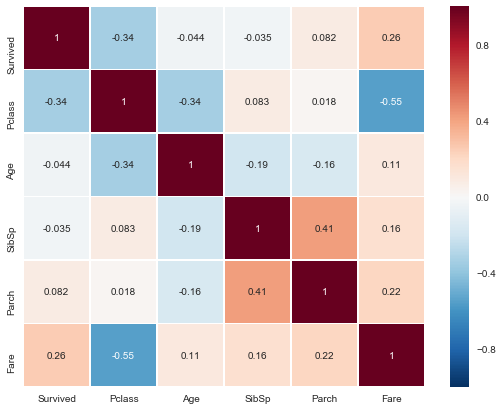

In [402]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(dfTrain.corr(),annot=True,linewidths=.5, ax=ax) 

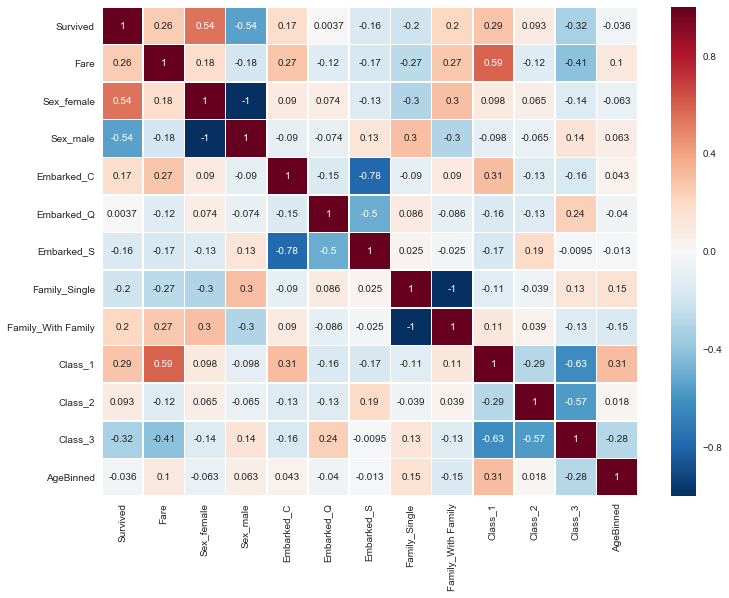

In [403]:
fig, ax = plt.subplots(figsize=(12,9))
sns.heatmap(train_dummies.corr(),annot=True,linewidths=.5, ax=ax) 

This heatmap gives us a great visual of the correlations between the features. 
If we take a closer look at the correlations with Survived - we can see tht gender columns are higher correlated as expected. Similarly, the Class 1 and 3 are also. Fare is also highly correlated (but this follows with the classes). 

We are now ready to start with building our prediction model.

In [404]:
# Create training and test sets

X_train = train_dummies.iloc[:,1:13]
y_train = train_dummies.iloc[:,0]
X_test = test_dummies.iloc[:,1:13]

In [405]:
# Import classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


# Imports for parameter setting and validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


We will run a few algorithms first and see their results. Then we will select one with a good performance and tune the model to improve it further.

In [406]:
# Run all algorithms with default settings

models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('LinearSVC', LinearSVC(random_state=0)))
models.append(('SVC', SVC()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('Random Forest', RandomForestClassifier(random_state=0)))
models.append(('Gradient Boosting', GradientBoostingClassifier()))

for name, model in models:
    clf = model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Model: "+name)
    print("Train Set Score: {}".format(model.score(X_train, y_train)))
    print("---------------")
    

Model: Logistic Regression
Train Set Score: 0.7946127946127947
---------------
Model: KNeighborsClassifier
Train Set Score: 0.8372615039281706
---------------
Model: GaussianNB
Train Set Score: 0.7665544332210998
---------------
Model: LinearSVC
Train Set Score: 0.7665544332210998
---------------
Model: SVC
Train Set Score: 0.8383838383838383
---------------
Model: DecisionTreeClassifier
Train Set Score: 0.9483726150392817
---------------
Model: Random Forest
Train Set Score: 0.9349046015712682
---------------
Model: Gradient Boosting
Train Set Score: 0.8911335578002245
---------------


Ok, I want to start with the Random Forest (even though we are getting a better result with Decision Tree) I think we can improve this performance through a bit of hyperparameters tuning and selecting a subset of the features and decrease overfitting.

Let us first select features for which we will be using SelectFromModel.

In [407]:
from sklearn.feature_selection import SelectFromModel

#RandomForestClassifier
select = SelectFromModel(
RandomForestClassifier(n_estimators=100, random_state=0),
threshold="median")
select.fit(X_train, y_train)

X_train_selected = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (891, 12)
X_train_selected.shape: (891, 6)


Ok, from 12 features we have reduced to 6 features.

In [408]:
print(X_train.info())
select.get_support()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
Fare                  891 non-null float64
Sex_female            891 non-null uint8
Sex_male              891 non-null uint8
Embarked_C            891 non-null uint8
Embarked_Q            891 non-null uint8
Embarked_S            891 non-null uint8
Family_Single         891 non-null uint8
Family_With Family    891 non-null uint8
Class_1               891 non-null uint8
Class_2               891 non-null uint8
Class_3               891 non-null uint8
AgeBinned             891 non-null int64
dtypes: float64(1), int64(1), uint8(10)
memory usage: 22.7 KB
None


array([ True,  True,  True, False, False, False, False, False,  True,
       False,  True,  True], dtype=bool)

So the final features selected are as follows:
Fare, Sex_female, Sex_male, Class_1, Class_3, AgeBinned

Our model has removed the Embarked and Family features.

In [409]:
# Select features for test as well using transform

X_test_selected = select.transform(X_test)

# Let's compare the scores for both the original and reduced features
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(rfc.score(X_train, y_train)))
rfc.fit(X_train_selected, y_train)
print("Score with selected features: {:.3f}".format(rfc.score(X_train_selected, y_train)))

Score with all features: 0.935
Score with selected features: 0.923


In [410]:
# RandomForestClassifier

# Create the grid of values for the C parameter
param_grid = {'n_estimators' : [1,3,5,10,100],
             'min_samples_leaf' : [1,3,5,10,50,100,200,500]} 
print('Parameter Grid : \n{}\n'.format(param_grid))

# We will implement a grid search with a stratified 3 folds cross validation using the Random Forest estimator
grid_search = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=3)

# Fit the estimator on the training data and predict on test data
grid_search.fit(X_train_selected, y_train)
y_pred = grid_search.predict(X_test_selected)
y_trainpred = grid_search.predict(X_train_selected)

# Outputs
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score (on Training Data): {:.2f}\n".format(grid_search.best_score_))
print("Classification report: \n{}".format(classification_report(y_train, y_trainpred)))
print("Confusion Matrix: \n{}\n".format(confusion_matrix(y_train, y_trainpred)))
print('Train Set score using RandomForestClassifier: {:.3f}'.format(grid_search.score(X_train_selected, y_train)))


Parameter Grid : 
{'n_estimators': [1, 3, 5, 10, 100], 'min_samples_leaf': [1, 3, 5, 10, 50, 100, 200, 500]}

Best parameters: {'min_samples_leaf': 3, 'n_estimators': 100}
Best cross-validation score (on Training Data): 0.81

Classification report: 
             precision    recall  f1-score   support

          0       0.88      0.95      0.91       549
          1       0.90      0.79      0.84       342

avg / total       0.89      0.89      0.88       891

Confusion Matrix: 
[[520  29]
 [ 72 270]]

Train Set score using RandomForestClassifier: 0.887


ok, we are misclassifying quite a few instances (101 out of 891). Let's take a closer look at the misclassified samples. 

In [411]:
misclassified_samples = X_train[y_train != y_trainpred]
misclassified_samples.shape

(101, 12)

In [412]:
temp = dfTrain.iloc[misclassified_samples.index,:]
temp.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
2,1,3,female,26.0,0,0,7.9250,S,Single
14,0,3,female,14.0,0,0,7.8542,S,Single
17,1,2,male,34.0,0,0,13.0000,S,Single
18,0,3,female,31.0,1,0,18.0000,S,With Family
21,1,2,male,34.0,0,0,13.0000,S,Single
25,1,3,female,38.0,1,5,31.3875,S,With Family
32,1,3,female,35.0,0,0,7.7500,Q,Single
36,1,3,male,21.0,0,0,7.2292,C,Single
41,0,2,female,27.0,1,0,21.0000,S,With Family
55,1,1,male,38.0,0,0,35.5000,S,Single


In [413]:
print('Misclassified Pclass')
print(temp['Pclass'].loc[temp['Survived']==1].value_counts())
print('-------------------------------')
print('Misclassified Sex')
print(temp['Sex'].loc[temp['Survived']==1].value_counts())
print('-------------------------------')
print('Misclassified Family')
print(temp['Family'].loc[temp['Survived']==1].value_counts())
print('-------------------------------')
print('Misclassified Embarked')
print(temp['Embarked'].loc[temp['Survived']==1].value_counts())

Misclassified Pclass
3    48
1    16
2     8
Name: Pclass, dtype: int64
-------------------------------
Misclassified Sex
male      60
female    12
Name: Sex, dtype: int64
-------------------------------
Misclassified Family
Single         49
With Family    23
Name: Family, dtype: int64
-------------------------------
Misclassified Embarked
S    46
C    20
Q     6
Name: Embarked, dtype: int64


In [414]:
submission = pd.DataFrame({
        "PassengerId": test_dummies["PassengerId"],
        "Survived": y_pred
    })
submission.to_csv('titanic.csv', index=False)

This model gets a score of  0.80861 on the unseen test set. 